<a href="https://colab.research.google.com/github/jagadeesh-nakka/machine-Learnig/blob/main/Copy_of_Face_Recognition_using_face_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install face_recognition

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.1/100.1 MB 10.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566171 sha256=a97a7478f387990f68e2224d4bddbfae4b38ffcbb4b255c6dc6f04179a438c73
  Stored in directory: /root/.cache/pip/wheels/7a/eb/cf/e9eced74122b679557f597bb7c8e4c739cfcac526db1fd523d
Successfully built face-recognition-models


In [ ]:
!mkdir known
!wget https://i.insider.com/5ddfa893fd9db26b8a4a2df7 -O known/1.jpg
!wget https://cdn-images-1.medium.com/max/1200/1*aEoYLgy4z1lT1kW7dqWzBg.jpeg -O known/2.jpg
!wget https://media2.s-nbcnews.com/j/newscms/2017_46/2224911/171113-bill-gates-se-247p_043bd413c63b2a97abf11bfad747538d.fit-760w.jpg -O known/3.jpg
!wget https://specials-images.forbesimg.com/imageserve/1184274010/960x0.jpg -O known/4.jpg

mkdir: cannot create directory ‘known’: File exists
--2023-09-28 13:01:33--  https://i.insider.com/5ddfa893fd9db26b8a4a2df7
Resolving i.insider.com (i.insider.com)... 151.101.2.217, 151.101.66.217, 151.101.130.217, ...
Connecting to i.insider.com (i.insider.com)|151.101.2.217|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2324104 (2.2M) [image/png]
Saving to: ‘known/1.jpg’

known/1.jpg         100%[===================>]   2.22M  --.-KB/s    in 0.07s   

2023-09-28 13:01:33 (32.1 MB/s) - ‘known/1.jpg’ saved [2324104/2324104]

--2023-09-28 13:01:33--  https://cdn-images-1.medium.com/max/1200/1*aEoYLgy4z1lT1kW7dqWzBg.jpeg
Resolving cdn-images-1.medium.com (cdn-images-1.medium.com)... 162.159.152.4, 162.159.153.4, 2606:4700:7::a29f:9904, ...
Connecting to cdn-images-1.medium.com (cdn-images-1.medium.com)|162.159.152.4|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /v2/resize:fit:1200/1*aEoYLgy4z1lT1kW7dqWzBg.jpeg [follo

In [ ]:
!mkdir unknown
!wget https://i.insider.com/5ddfa893fd9db26b8a4a2df7 -O unknown/1.jpg
!wget https://cdn-images-1.medium.com/max/1200/1*aEoYLgy4z1lT1kW7dqWzBg.jpeg -O unknown/2.jpg
!wget https://media2.s-nbcnews.com/j/newscms/2017_46/2224911/171113-bill-gates-se-247p_043bd413c63b2a97abf11bfad747538d.fit-760w.jpg -O unknown/3.jpg
!wget https://specials-images.forbesimg.com/imageserve/1184274010/960x0.jpg -O unknown/4.jpg

--2023-09-28 13:01:44--  https://i.insider.com/5ddfa893fd9db26b8a4a2df7
Resolving i.insider.com (i.insider.com)... 151.101.2.217, 151.101.66.217, 151.101.130.217, ...
Connecting to i.insider.com (i.insider.com)|151.101.2.217|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2324104 (2.2M) [image/png]
Saving to: ‘unknown/1.jpg’

unknown/1.jpg       100%[===================>]   2.22M  --.-KB/s    in 0.06s   

2023-09-28 13:01:44 (34.5 MB/s) - ‘unknown/1.jpg’ saved [2324104/2324104]

--2023-09-28 13:01:44--  https://cdn-images-1.medium.com/max/1200/1*aEoYLgy4z1lT1kW7dqWzBg.jpeg
Resolving cdn-images-1.medium.com (cdn-images-1.medium.com)... 162.159.152.4, 162.159.153.4, 2606:4700:7::a29f:9904, ...
Connecting to cdn-images-1.medium.com (cdn-images-1.medium.com)|162.159.152.4|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /v2/resize:fit:1200/1*aEoYLgy4z1lT1kW7dqWzBg.jpeg [following]
--2023-09-28 13:01:45--  https://cdn-image

Processing known/.ipynb_checkpoints
Error processing image known/.ipynb_checkpoints: Failed to load image at path: known/.ipynb_checkpoints
Processing known/jagadeesh.png
Processing known/Elon.jpg
Processing known/bill gates.jpg
Processing known/narzia.jpg
Processing known/ravi_teja.jpg
Processing unknown/nidhi.png


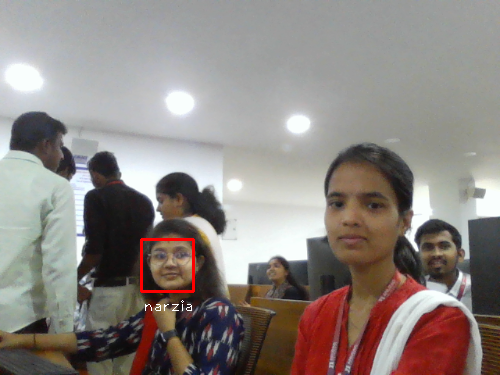

Processing unknown/3.jpg


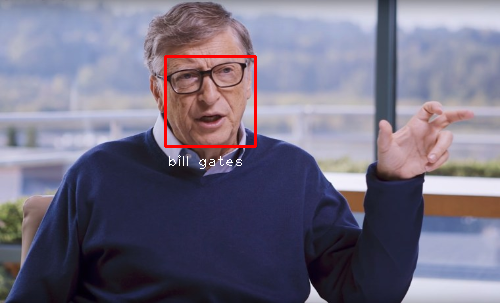

Processing unknown/.ipynb_checkpoints
Error processing image unknown/.ipynb_checkpoints: Failed to load image at path: unknown/.ipynb_checkpoints
Processing unknown/1.jpg


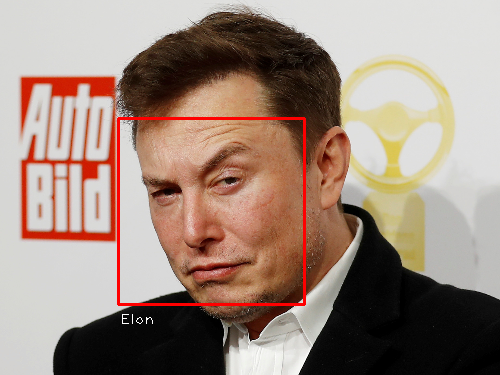

Processing unknown/opencvframe_frame_0.png


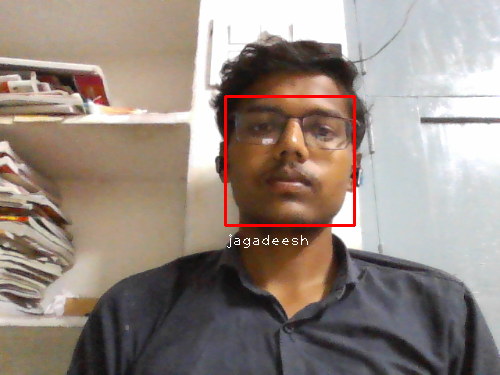

Processing unknown/narzia.jpg


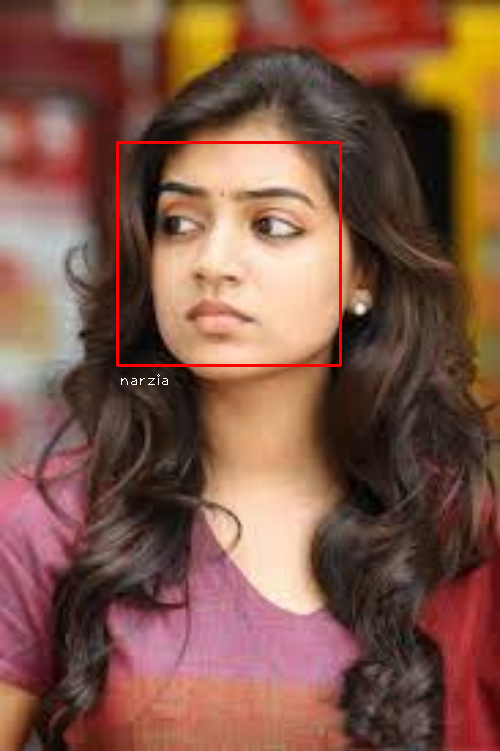

Processing unknown/ravi_teja.jpg


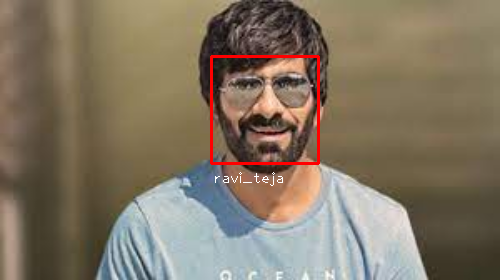

In [ ]:
import face_recognition
import cv2
import os
from google.colab.patches import cv2_imshow

def read_img(path):
    img = cv2.imread(path)
    if img is None:
        raise ValueError(f"Failed to load image at path: {path}")
    (h, w) = img.shape[:2]
    width = 500
    ratio = width / float(w)
    height = int(h * ratio)
    return cv2.resize(img, (width, height))

known_encodings = []
known_names = []
known_dir = 'known'

# Process known images
for file in os.listdir(known_dir):
    img_path = os.path.join(known_dir, file)
    print("Processing", img_path)
    try:
        img = read_img(img_path)
        img_enc = face_recognition.face_encodings(img)[0]
        known_encodings.append(img_enc)
        known_names.append(file.split('.')[0])
    except Exception as e:
        print(f"Error processing image {img_path}: {str(e)}")

unknown_dir = 'unknown'

# Process unknown images
for file in os.listdir(unknown_dir):
    img_path = os.path.join(unknown_dir, file)
    print("Processing", img_path)
    try:
        img = read_img(img_path)
        img_enc = face_recognition.face_encodings(img)[0]

        results = face_recognition.compare_faces(known_encodings, img_enc)

        for i in range(len(results)):
            if results[i]:
                name = known_names[i]
                (top, right, bottom, left) = face_recognition.face_locations(img)[0]
                cv2.rectangle(img, (left, top), (right, bottom), (0, 0, 255), 2)
                cv2.putText(img, name, (left+2, bottom+20), cv2.FONT_HERSHEY_PLAIN, 1, (255, 255, 255), 1)
                cv2_imshow(img)
    except Exception as e:
        print(f"Error processing image {img_path}: {str(e)}")
